In [65]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST, CIFAR10

from typing import Callable, Union

In [69]:
class QuadrantMNIST(MNIST):
    """ MNIST where images are placed in random quadrant using fixed random seed """

    def __init__(self, root: str, shape = (32, 32),
                 train: bool = True, transform: Union[Callable, type(None)] = None,
                 target_transform: Union[Callable, type(None)] = None, download: bool = False):
        super().__init__(root, train, transform, target_transform, download)
        """
        Args:
            root (string): Root directory of dataset where ``MNIST/processed/training.pt``
                and  ``MNIST/processed/test.pt`` exist.
            train (bool, optional): If True, creates dataset from ``training.pt``,
                otherwise from ``test.pt``.
            download (bool, optional): If true, downloads the dataset from the internet and
                puts it in root directory. If dataset is already downloaded, it is not
                downloaded again.
            transform (callable, optional): A function/transform that  takes in an PIL image
                and returns a transformed version. E.g, ``transforms.RandomCrop``
            target_transform (callable, optional): A function/transform that takes in the
                target and transforms it.
                same arguments as torchvision.see arguments of torchvision.dataset.MNIST)
        """
        self.classes = [f"({x}, upper left)" for x in range(10)] + \
                       [f"({x}, upper right)" for x in range(10)] + \
                       [f"({x}, lower left)" for x in range(10)] + \
                       [f"({x}, lower right)" for x in range(10)]

        N, H, W = self.data.shape
        
        torch.manual_seed(1000 + int(train))        
        quadrants = torch.randint(0, 4, (N,))
        
        new_targets = self.targets + 10 * quadrants
        
        new_data = torch.zeros((N, H * 2, W * 2), dtype=self.data.dtype)
        
        for i in range(N):
            quadrant = quadrants[i]
            
            dx = 28 if quadrant in (1, 3) else 0 # left/right
            dy = 28 if quadrant in (2, 3) else 0 # upper/lower
            
            new_data[i, dy:dy+H, dx:dx+W] = self.data[i]
            
        old_dtype = new_data.dtype
        
        new_data = transforms.Resize(shape, antialias=False)(new_data)
        
        self.data = new_data
        self.targets = new_targets

In [70]:
dataset = QuadrantMNIST('tmp', download=True)

0
(5, upper right)


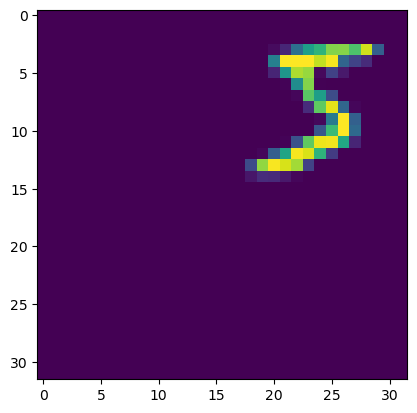

1
(0, upper right)


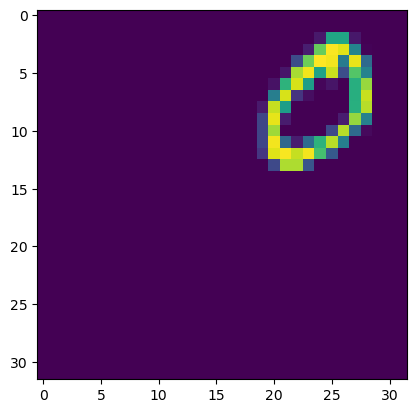

2
(4, upper right)


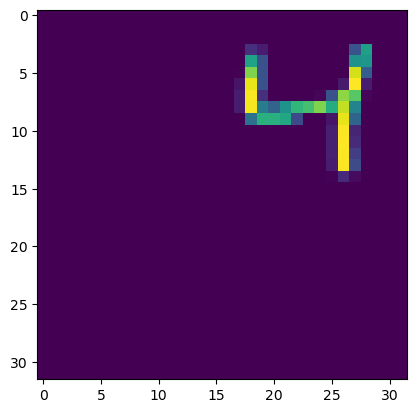

3
(1, lower left)


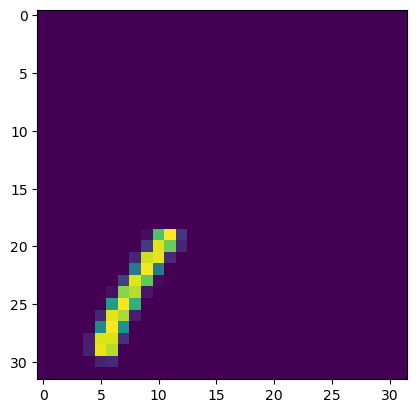

4
(9, lower left)


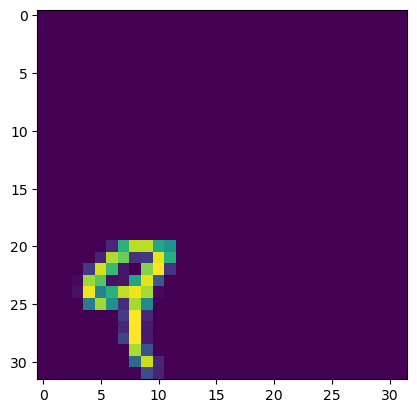

5
(2, lower right)


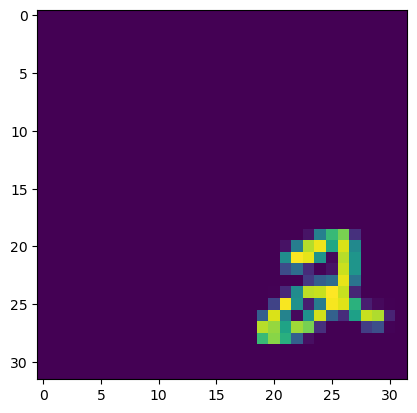

6
(1, upper left)


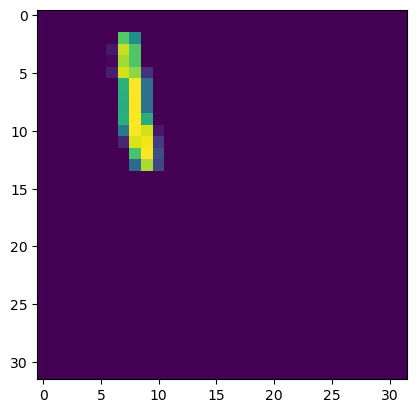

7
(3, upper left)


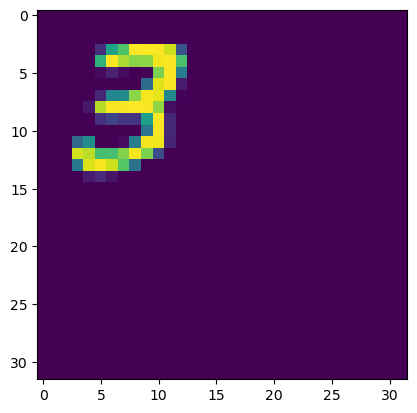

8
(1, lower left)


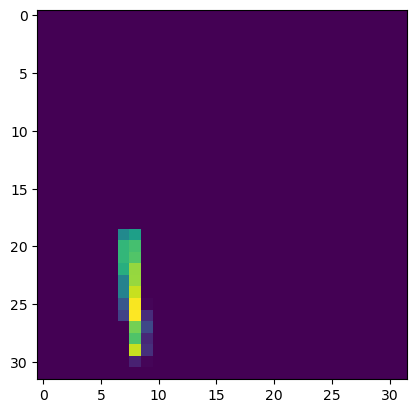

9
(4, lower right)


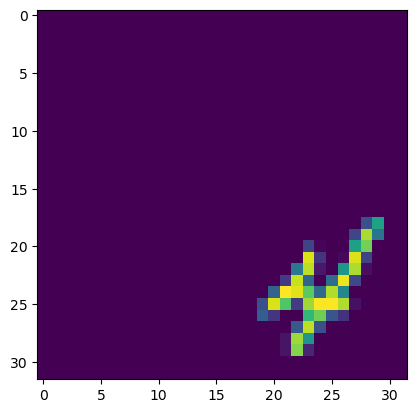

10
(3, lower right)


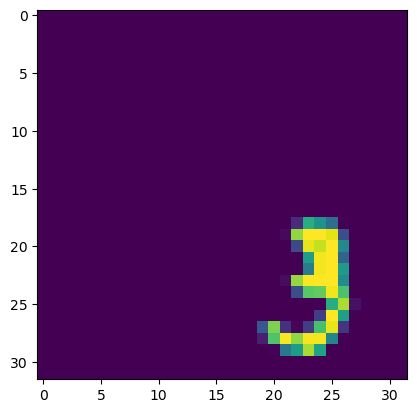

11
(5, upper right)


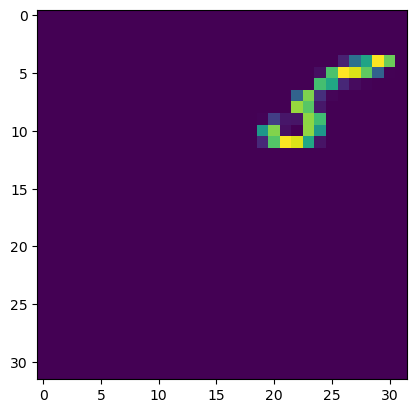

12
(3, upper left)


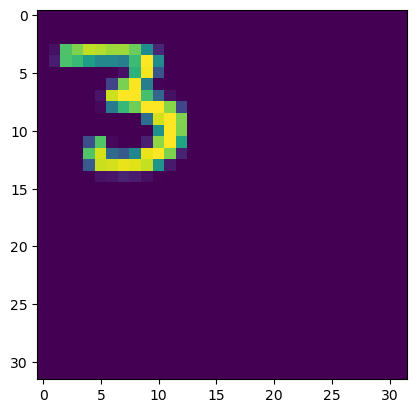

13
(6, upper left)


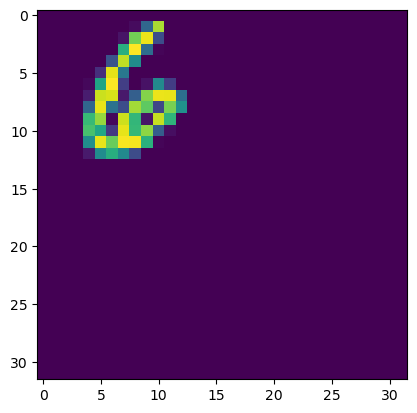

14
(1, upper right)


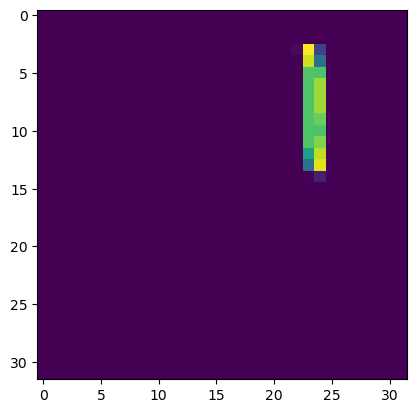

15
(7, upper right)


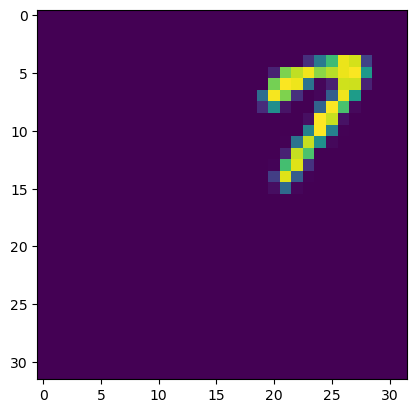

16
(2, lower left)


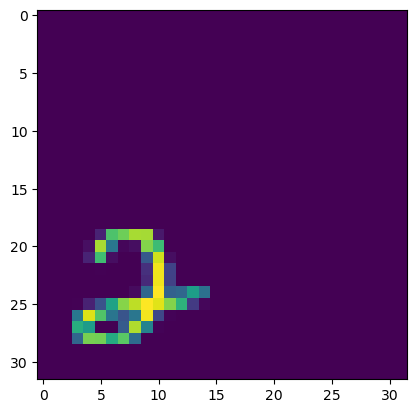

17
(8, upper right)


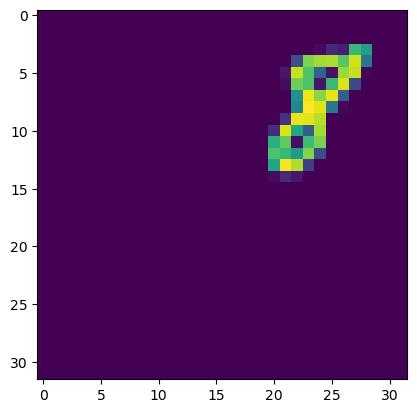

18
(6, lower right)


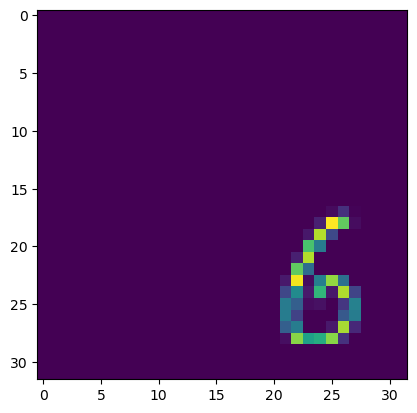

19
(9, upper right)


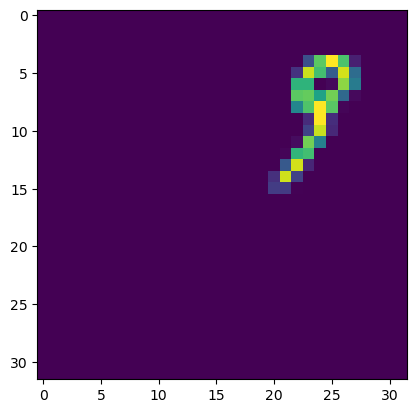

20
(4, lower right)


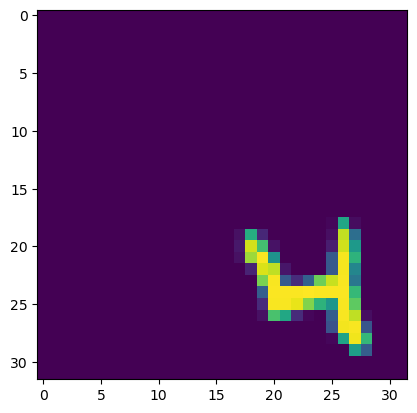

21
(0, upper left)


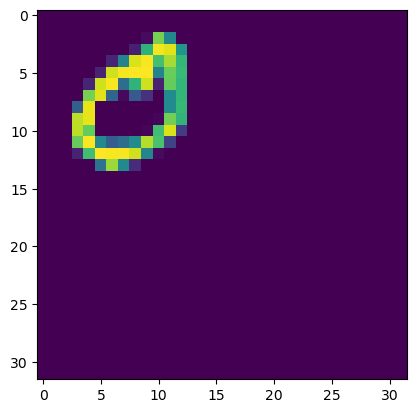

22
(9, lower left)


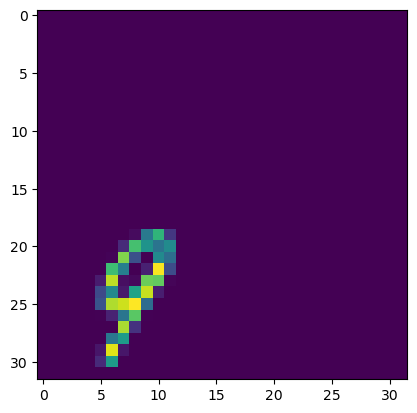

23
(1, upper left)


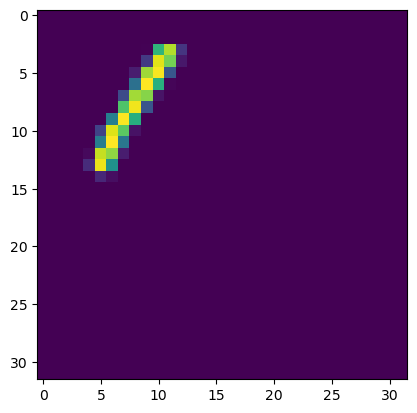

24
(1, upper left)


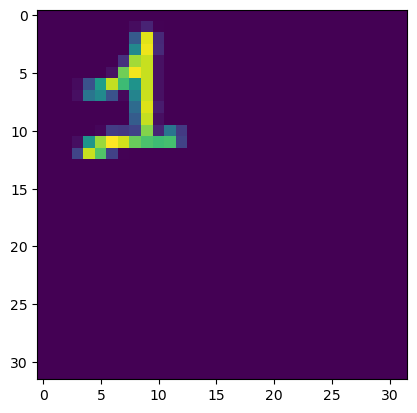

25
(2, upper right)


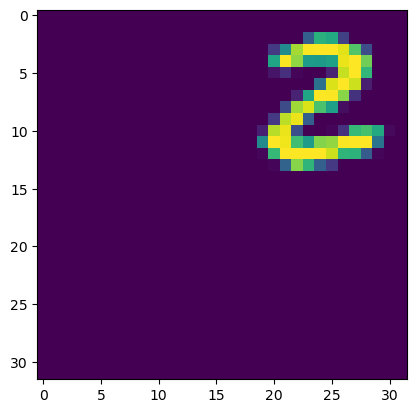

26
(4, upper right)


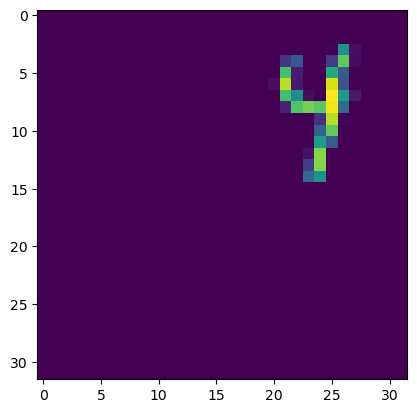

27
(3, upper left)


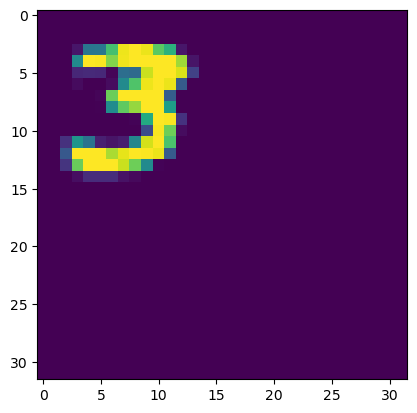

28
(2, lower left)


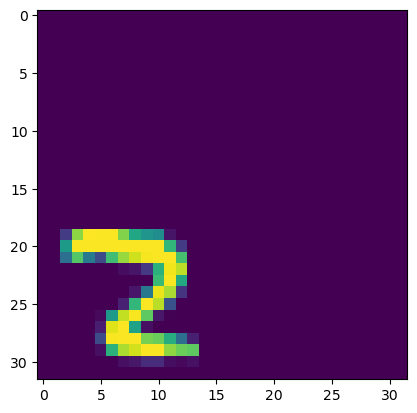

29
(7, upper left)


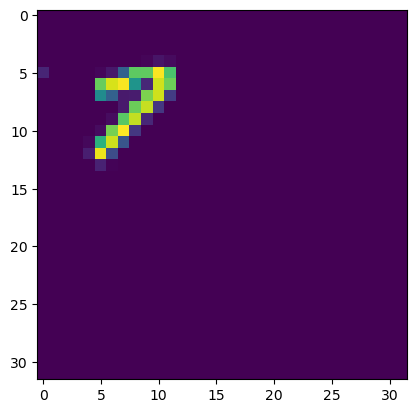

30
(3, upper right)


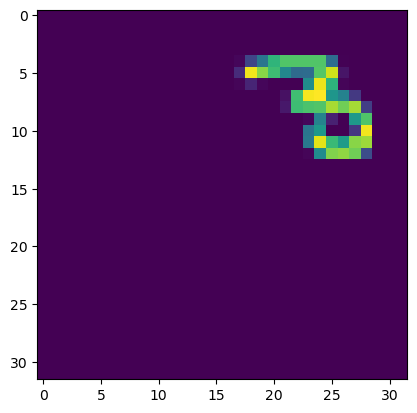

31
(8, upper left)


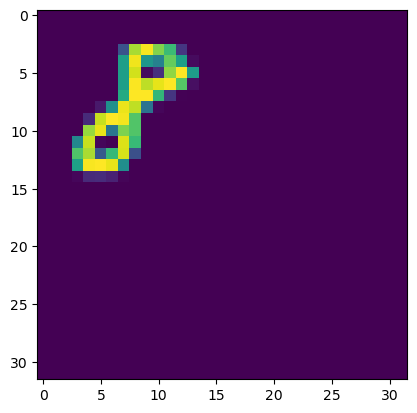

32
(6, upper right)


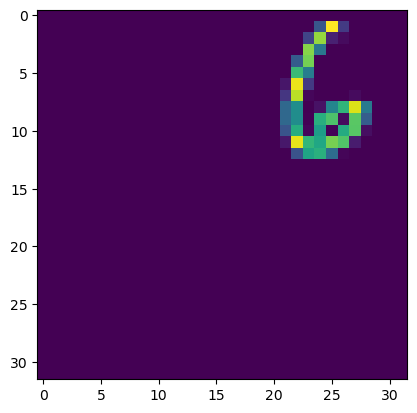

33
(9, upper left)


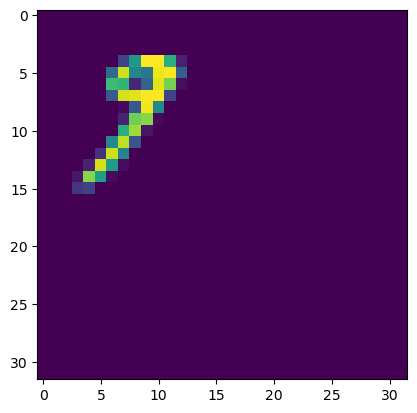

34
(0, upper left)


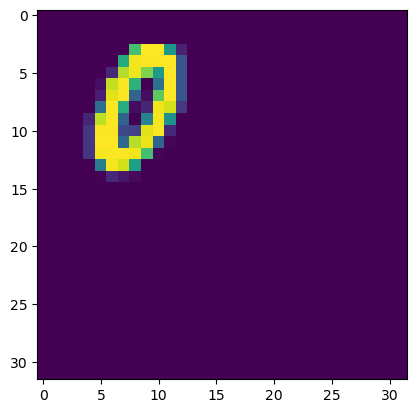

35
(5, upper right)


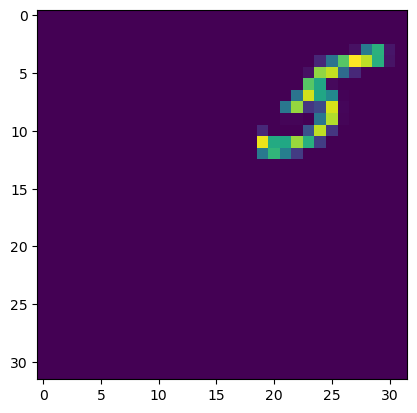

36
(6, lower left)


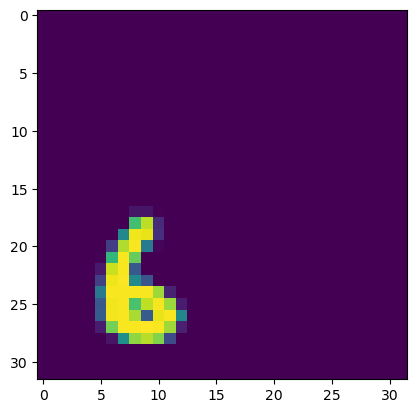

37
(0, lower left)


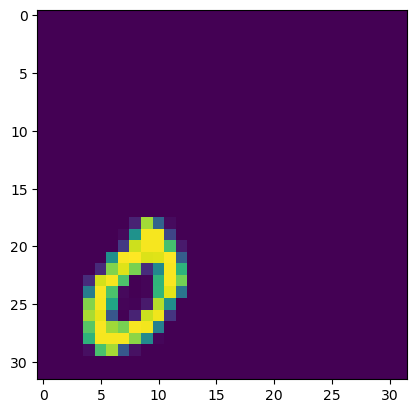

38
(7, upper right)


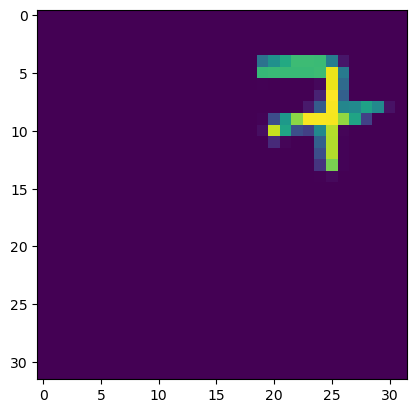

39
(6, upper right)


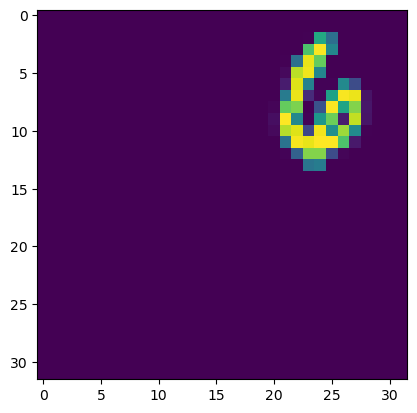

40
(1, upper right)


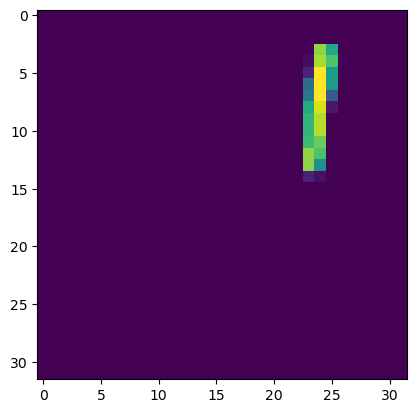

41
(8, lower left)


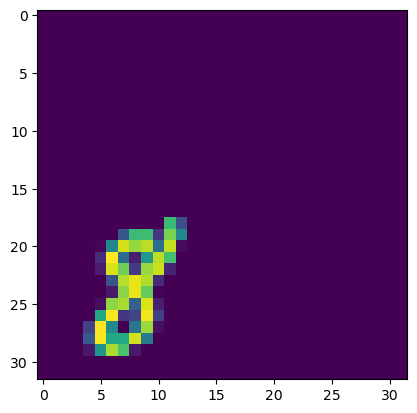

42
(7, lower left)


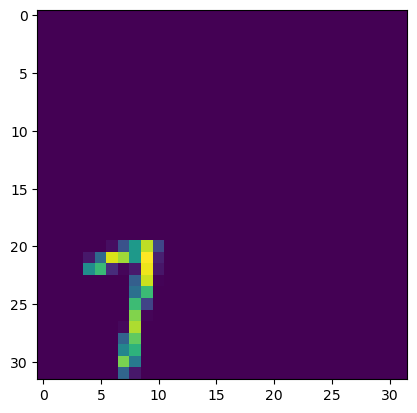

43
(9, upper left)


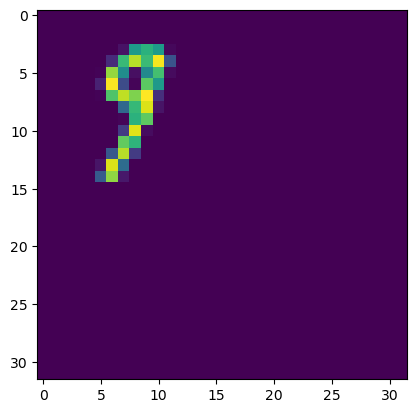

44
(3, lower right)


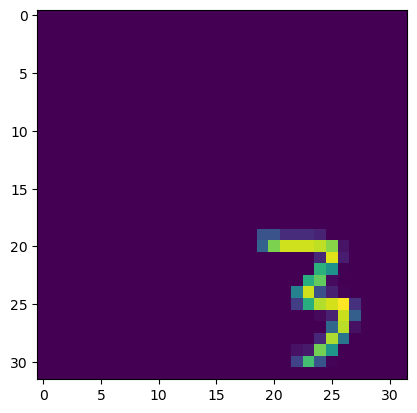

45
(9, lower left)


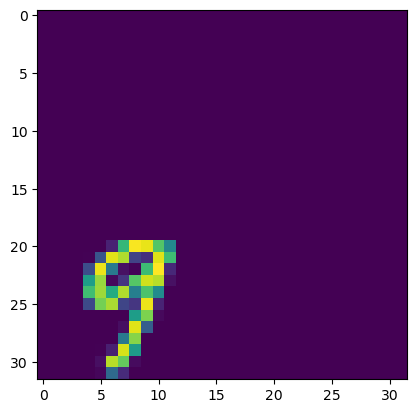

46
(8, lower right)


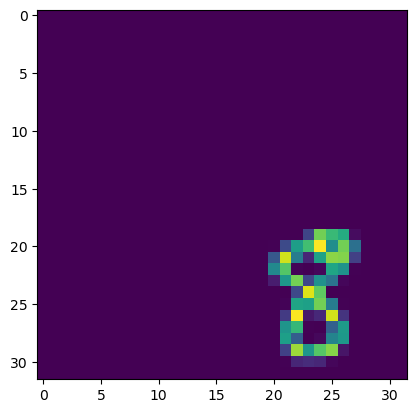

47
(5, upper right)


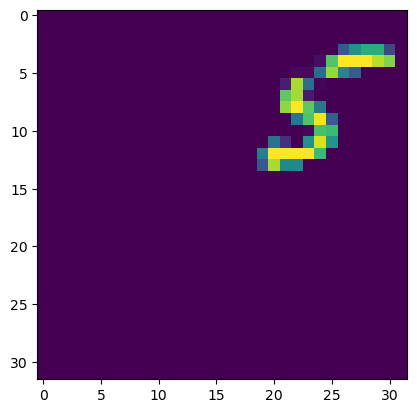

48
(9, upper left)


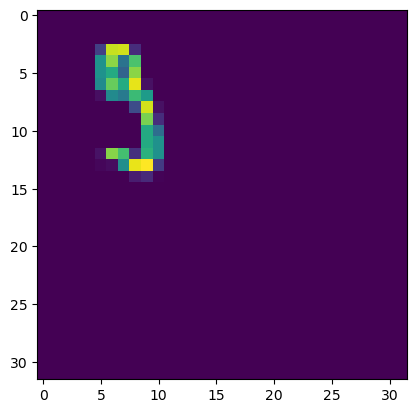

49
(3, lower left)


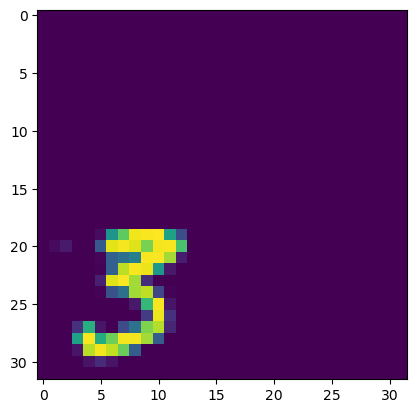

50
(3, lower right)


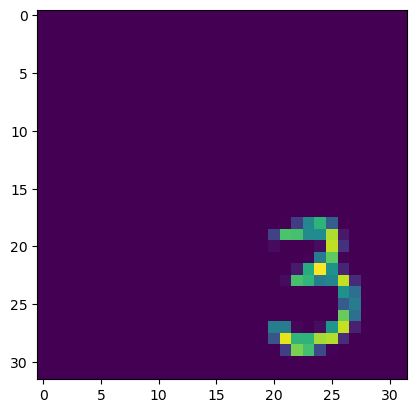

51
(0, lower right)


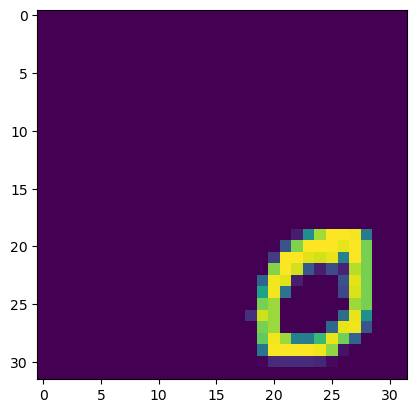

52
(7, upper right)


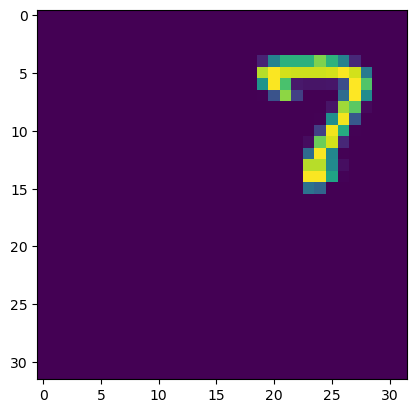

53
(4, lower right)


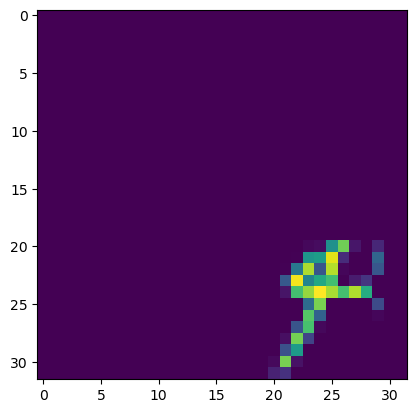

54
(9, upper left)


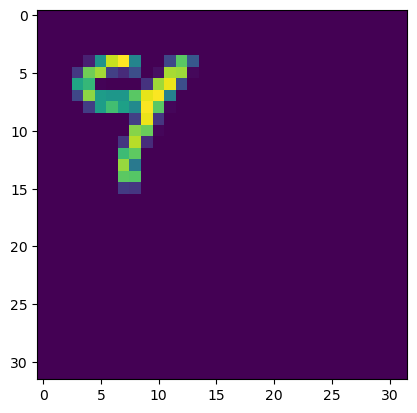

55
(8, lower left)


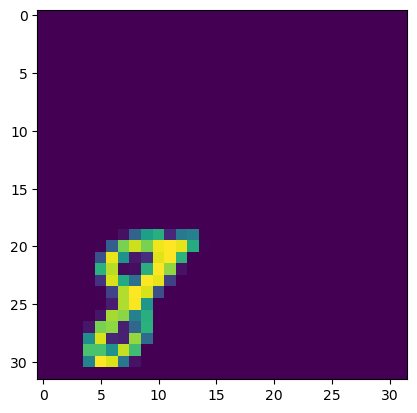

56
(0, lower left)


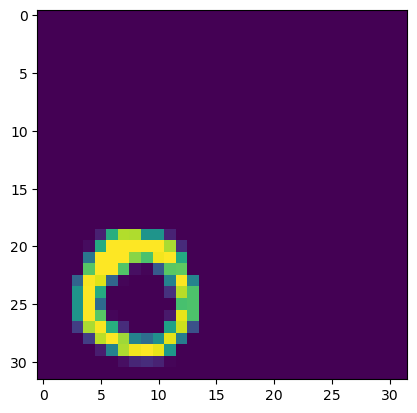

57
(9, upper right)


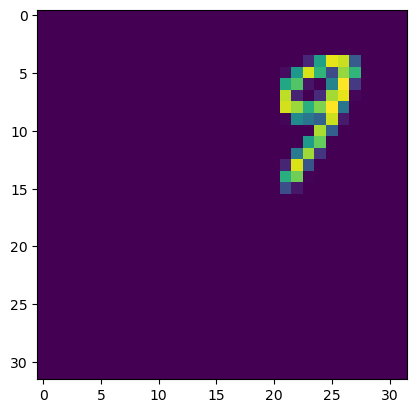

58
(4, lower left)


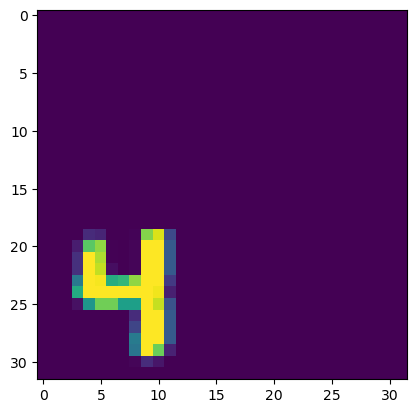

59
(1, lower right)


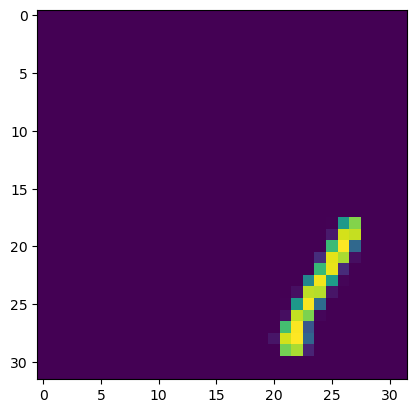

60
(4, lower left)


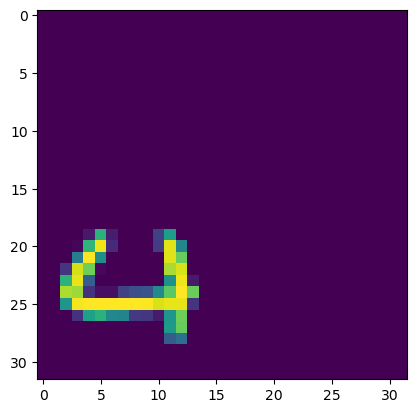

61
(4, lower right)


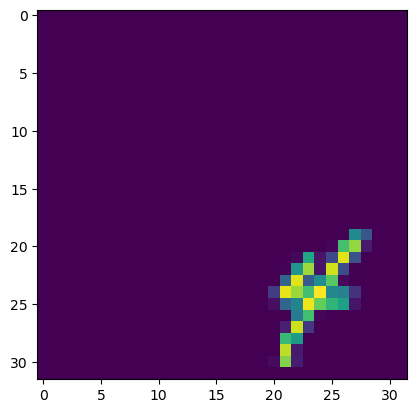

62
(6, upper left)


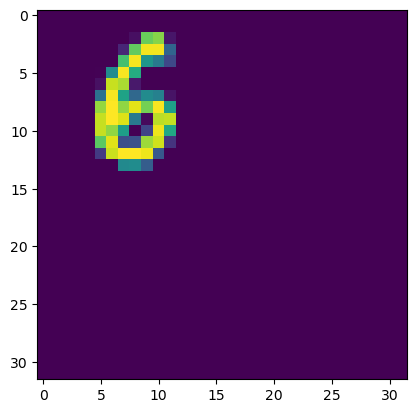

63
(0, upper right)


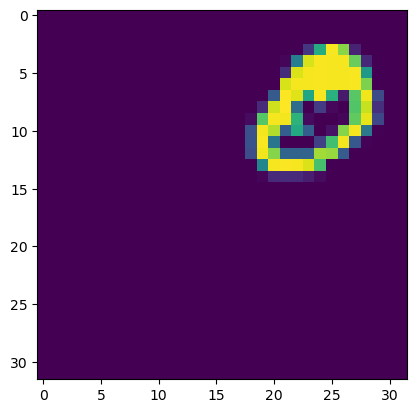

64
(4, lower left)


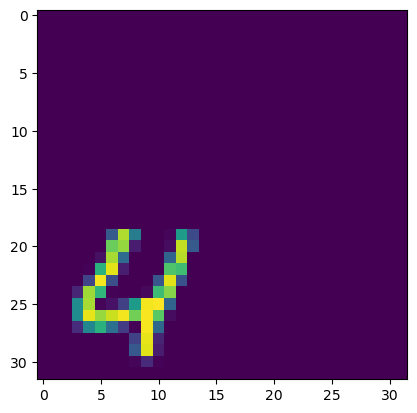

65
(5, upper left)


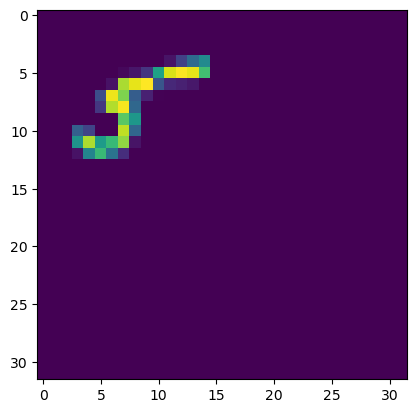

66
(6, upper right)


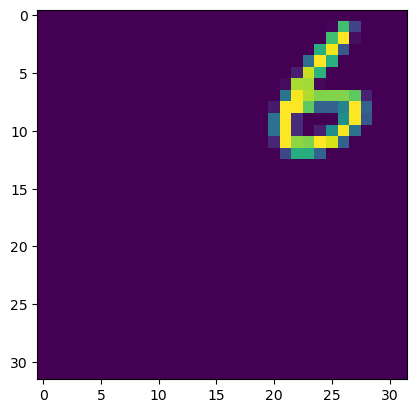

67
(1, upper left)


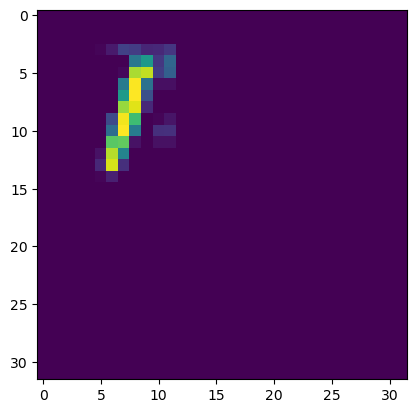

68
(0, upper right)


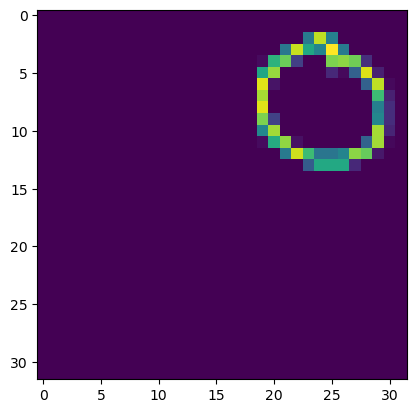

69
(0, lower left)


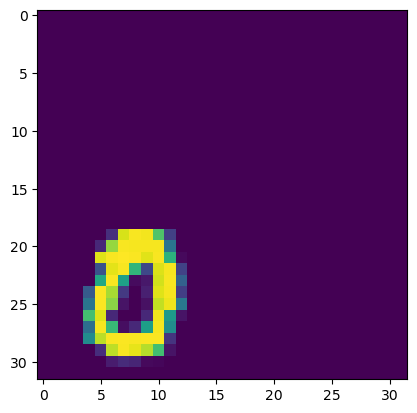

70
(1, lower right)


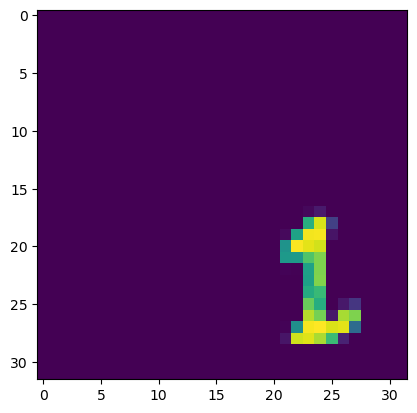

71
(7, lower left)


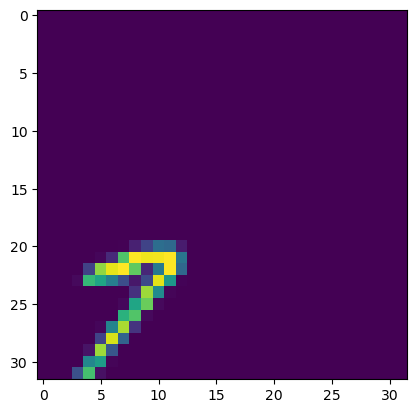

72
(1, upper left)


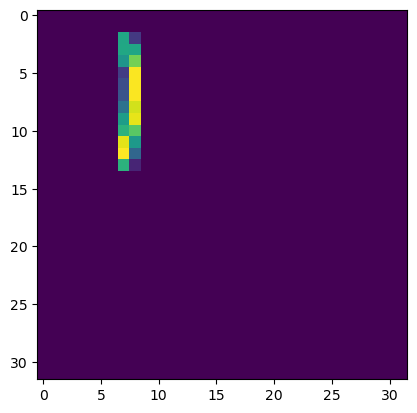

73
(6, upper right)


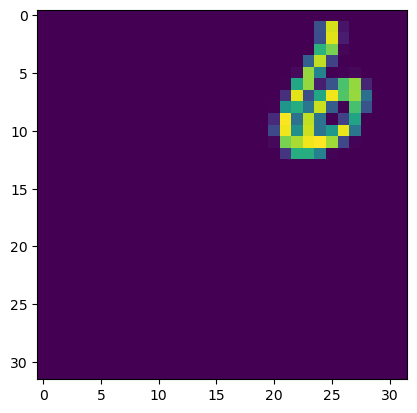

74
(3, upper left)


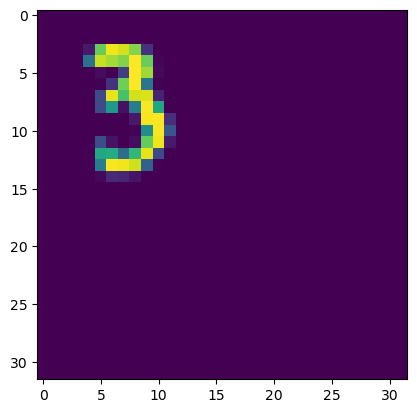

75
(0, lower left)


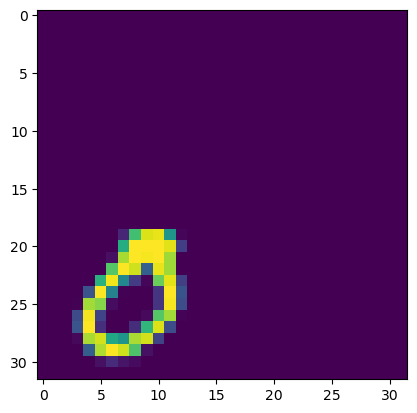

76
(2, upper left)


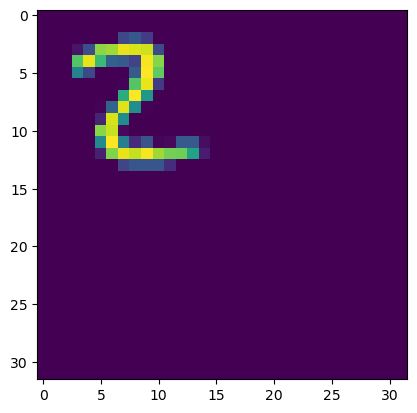

77
(1, lower right)


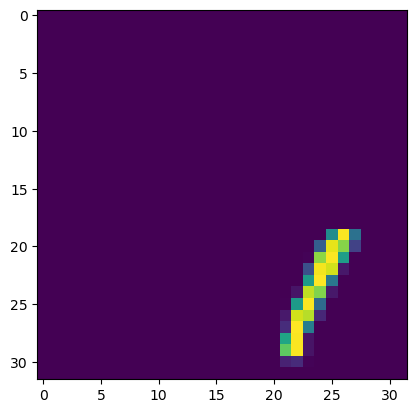

78
(1, upper left)


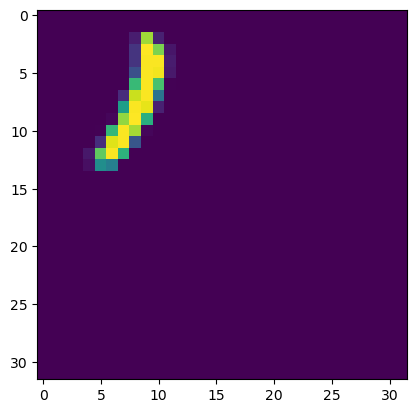

79
(7, lower right)


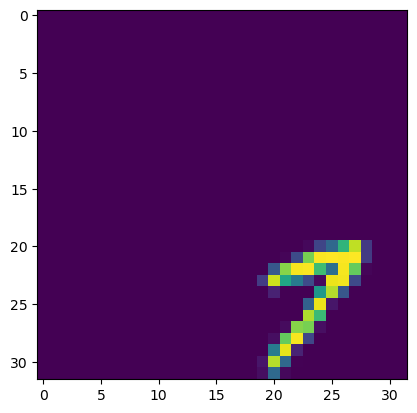

80
(9, upper left)


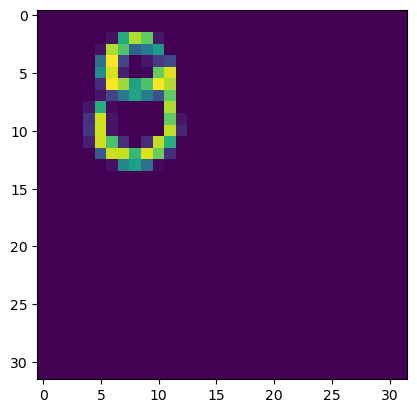

81
(0, lower left)


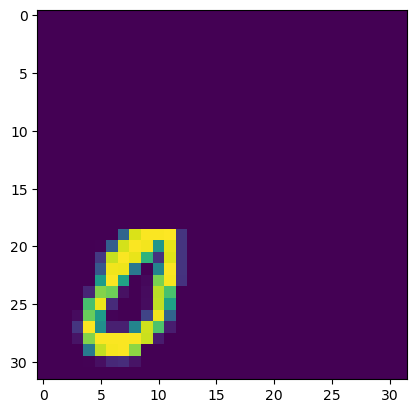

82
(2, upper right)


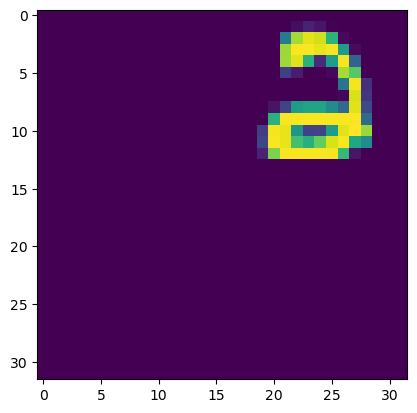

83
(6, lower left)


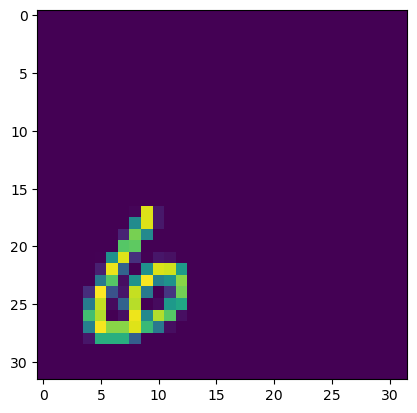

84
(7, upper left)


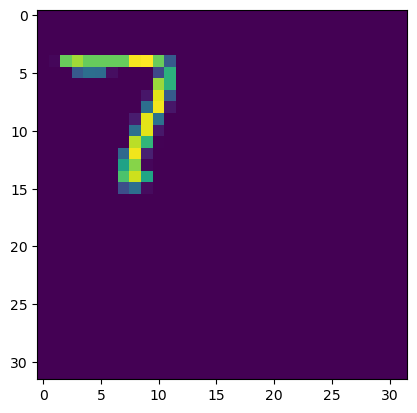

85
(8, upper left)


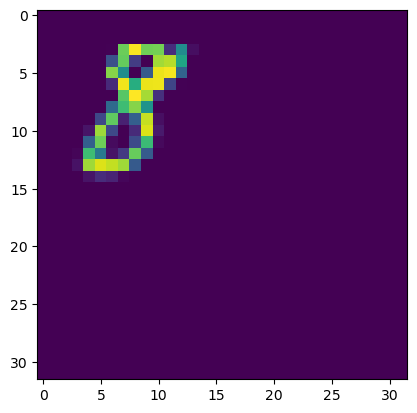

86
(3, lower left)


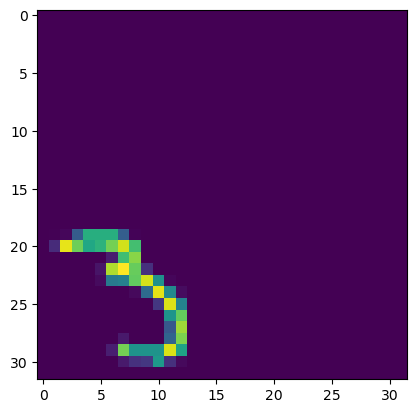

87
(9, lower left)


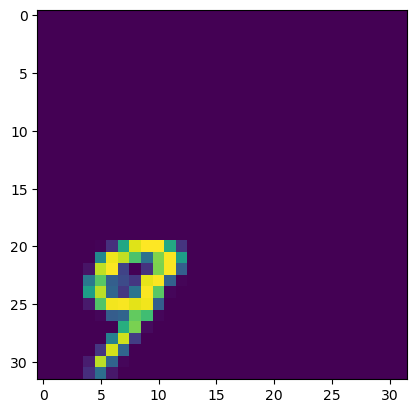

88
(0, upper left)


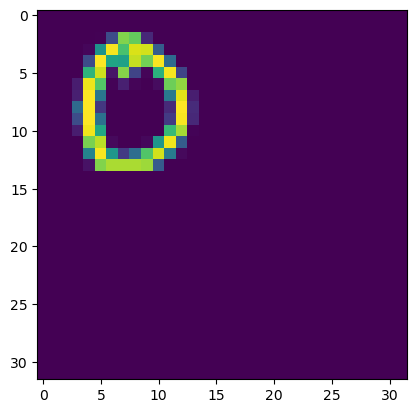

89
(4, lower left)


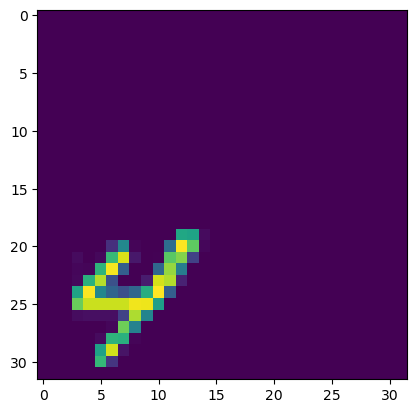

90
(6, upper right)


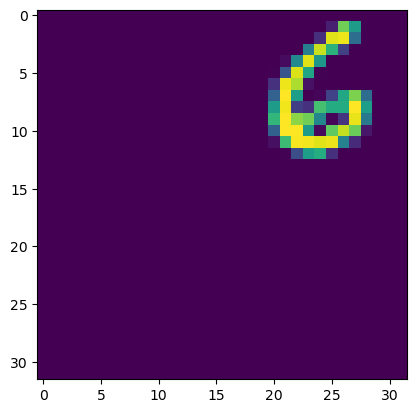

91
(7, lower left)


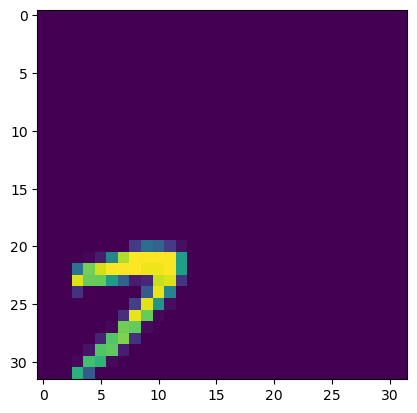

92
(4, lower left)


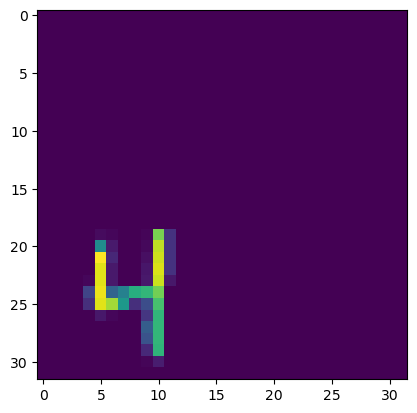

93
(6, lower right)


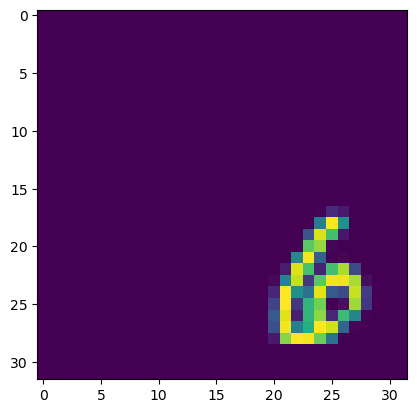

94
(8, lower left)


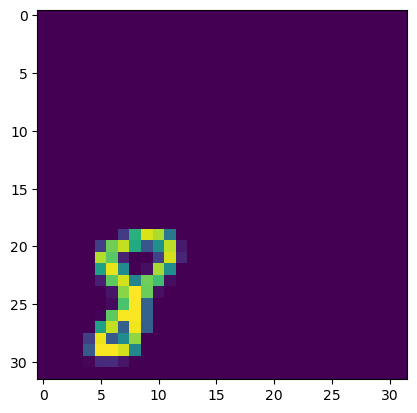

95
(0, lower right)


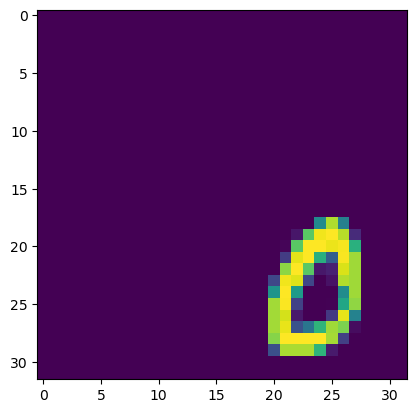

96
(7, upper right)


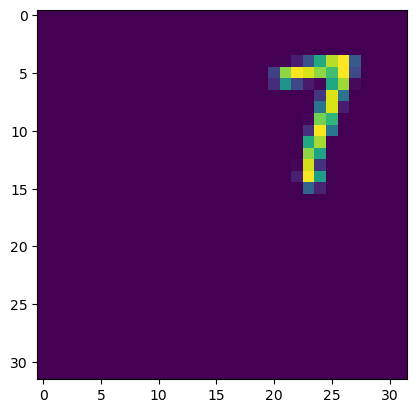

97
(8, upper right)


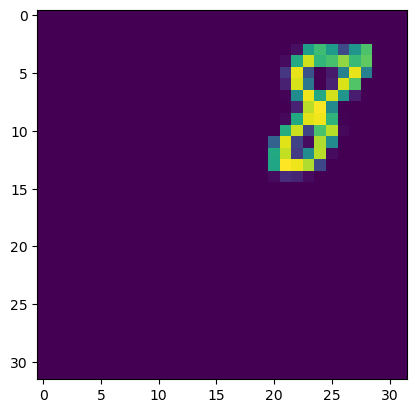

98
(3, upper left)


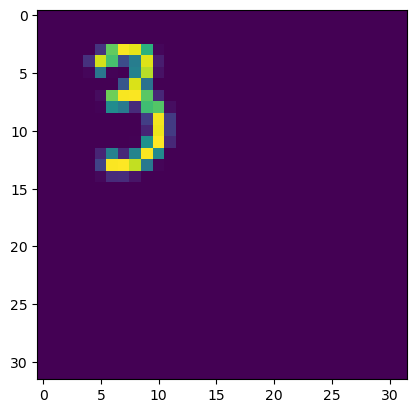

99
(1, upper right)


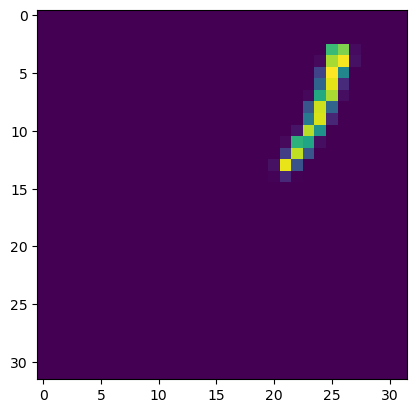

In [71]:
import matplotlib.pyplot as plt

for index in range(100):
    print(index)
    print(dataset.classes[dataset[index][1]])
    plt.imshow(dataset[index][0])
    plt.show()